# Frequency Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1.1

In [2]:
daily_demand = pd.Series([2, 1, 0, 2, 1, 
                          3, 0, 2, 4, 0, 
                          3, 2, 3, 4, 2, 
                          2, 2, 4, 3, 0])

In [3]:
df = pd.DataFrame({'Frequency': daily_demand.value_counts().sort_index()}, index = sorted(daily_demand.unique()))
df.index.name = 'Daily Demand'
df.loc['Total'] = df.sum()
df

,Frequency
Daily Demand,
0,4
1,2
2,7
3,4
4,3
Total,20


## Problem 1.2

In [4]:
df['Relative Frequency'] = pd.Series(daily_demand.value_counts(normalize = True).sort_index())
df.loc['Total', 'Relative Frequency'] = df['Relative Frequency'].sum()
df

,Frequency,Relative Frequency
Daily Demand,,
0,4,0.20
1,2,0.10
2,7,0.35
3,4,0.20
4,3,0.15
Total,20,1.00


## Problem 1.3

In [5]:
df['Cumulative Relative Frequency'] = df['Relative Frequency'].cumsum()
df.loc['Total', 'Cumulative Relative Frequency'] = df['Relative Frequency'].sum() - 1
df

,Frequency,Relative Frequency,Cumulative Relative Frequency
Daily Demand,,,
0,4,0.20,0.20
1,2,0.10,0.30
2,7,0.35,0.65
3,4,0.20,0.85
4,3,0.15,1.00
Total,20,1.00,1.00


## Problem 1.4

In [6]:
calls_per_day = pd.Series([4,5,1,0,7,8,
                           3,6,8,3,0,9,
                           2,12,14,5,5,10,
                           7,2,11,9,4,3,
                           1,5,7,3,5,6])

In [7]:
cuts = pd.cut(calls_per_day, [0,2,5,8,11,14], include_lowest=True)
df2 = pd.DataFrame(pd.value_counts(cuts, sort=False),  columns = ['Frequency'])
df2.index.name = 'Calls per Day'
df2

,Frequency
Calls per Day,
"(-0.001, 2.0]",6
"(2.0, 5.0]",11
"(5.0, 8.0]",7
"(8.0, 11.0]",4
"(11.0, 14.0]",2


## Problem 1.5

In [8]:
df2['Relative Frequency'] = pd.value_counts(cuts, sort=False, normalize=True)
df2

,Frequency,Relative Frequency
Calls per Day,,
"(-0.001, 2.0]",6,0.200000
"(2.0, 5.0]",11,0.366667
"(5.0, 8.0]",7,0.233333
"(8.0, 11.0]",4,0.133333
"(11.0, 14.0]",2,0.066667


## Problem 1.6

In [9]:
df2['Cumulative Relative Frequency'] = df2['Relative Frequency'].cumsum()
df2

,Frequency,Relative Frequency,Cumulative Relative Frequency
Calls per Day,,,
"(-0.001, 2.0]",6,0.200000,0.200000
"(2.0, 5.0]",11,0.366667,0.566667
"(5.0, 8.0]",7,0.233333,0.800000
"(8.0, 11.0]",4,0.133333,0.933333
"(11.0, 14.0]",2,0.066667,1.000000


# Histograms
## Problem 1.7

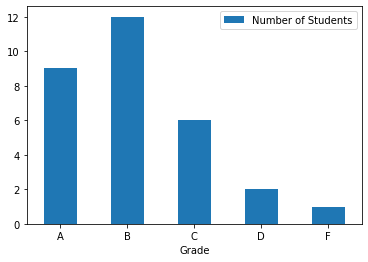

In [10]:
df3 = pd.DataFrame({'Grade': ['A', 'B', 'C', 'D', 'F'], 'Number of Students': [9, 12, 6, 2, 1]})
df3.plot.bar(x = 'Grade', y = 'Number of Students', rot = 0)

## Problem 1.8

In [11]:
com_miles = pd.Series([0,1,2,5,5,5,6,6,6,7,7,7,7,9,9,9,11,11,11,13,
                       13,13,14,14,14,14,14,14,14,14,15,15,15,15,15,
                       17,17,18,18,19,19,21,21,21,21,21,21,24,24,23])

Text(0, 0.5, 'Number of Employees')

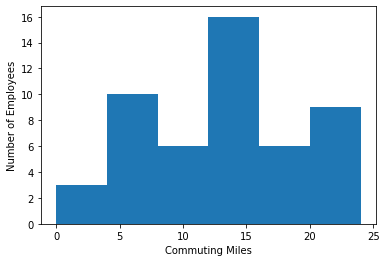

In [12]:
hist1 = com_miles.plot(kind='hist', bins=6)
hist1.set_xlabel("Commuting Miles")
hist1.set_ylabel("Number of Employees")

## Problem 1.9

In [13]:
miles_per_tank = pd.Series([302, 315, 265, 296, 289, 301, 308, 280, 285, 318,
                           267, 300, 309, 312, 299, 316, 301, 286, 281, 311,
                           272, 295, 305, 283, 309, 313, 278, 284, 296, 291,
                           310, 302, 282, 287, 307, 305, 314, 318, 308, 280])

Text(0, 0.5, 'Number of Tanks')

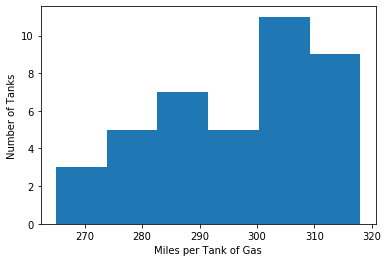

In [14]:
hist2 = miles_per_tank.plot(kind='hist', bins=6)
hist2.set_xlabel('Miles per Tank of Gas')
hist2.set_ylabel('Number of Tanks')

## Problem 1.10

Text(0, 0.5, 'Number of Players')

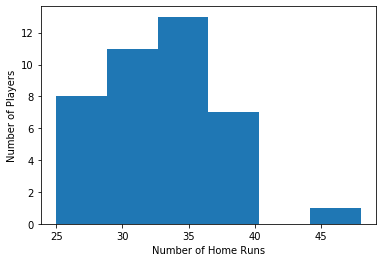

In [15]:
home_runs = pd.Series([
    48,40,38,37,37,37,37,37,36,36,
    35,34,34,34,33,33,33,33,33,33,
    33,32,32,32,32,32,31,31,29,29,
    29,29,28,28,27,27,27,27,27,25])
hist3 = home_runs.plot(kind='hist', bins=6)
hist3.set_xlabel('Number of Home Runs')
hist3.set_ylabel('Number of Players')

In [16]:
dict2 = {'25-28': len([x for x in home_runs if 25 <= x <= 28]),
        '29-32': len([x for x in home_runs if 29 <= x <= 32]),
        '33-36': len([x for x in home_runs if 33 <= x <= 36]),
        '37-40': len([x for x in home_runs if 37 <= x <= 40]),
        '41-44': len([x for x in home_runs if 41 <= x <= 44]),
        '45-48': len([x for x in home_runs if 48 <= x <= 48]),
        }

Text(0, 0.5, 'Number of Players ')

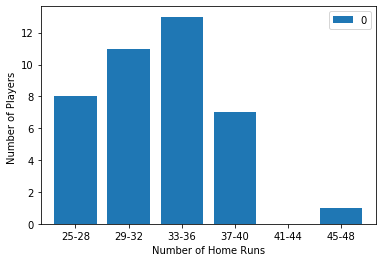

In [17]:
home_runs1 = pd.DataFrame.from_dict(dict2, orient='index')
chart = home_runs1.plot(kind='bar', rot=0, width=0.8)
chart.set_xlabel('Number of Home Runs')
chart.set_ylabel('Number of Players ')

# Bar Charts
## Problem 1.11

Text(0, 0.5, 'Balance($)')

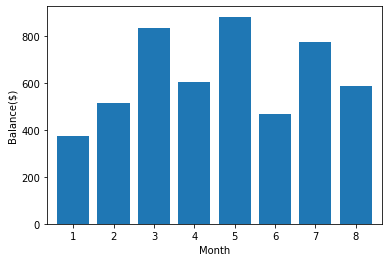

In [18]:
balance = pd.Series([375, 514, 834, 603, 882, 468, 775, 585], index = [1, 2, 3, 4, 5, 6, 7, 8])
chart2 = balance.plot(kind='bar',rot=0, width=0.8)
chart2.set_xlabel('Month')
chart2.set_ylabel('Balance($)')

## Problem 1.12

Text(0, 0.5, 'Total Sales(in Dollars)')

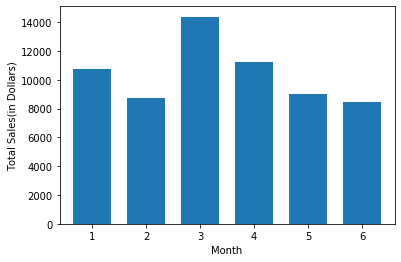

In [19]:
sales = pd.Series([10734, 8726, 14387, 11213, 9008, 8430], index = [1, 2, 3, 4, 5, 6])
chart3 = sales.plot(kind='bar', rot=0, width=0.7)
chart3.set_xlabel('Month')
chart3.set_ylabel('Total Sales(in Dollars)')

## Problem 1.13

Text(0, 0.5, 'Week')

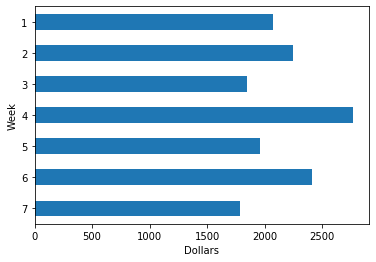

In [20]:
donations = pd.Series([2070, 2247, 1850, 2771, 1955, 2412, 1782], index = [1,2,3,4,5,6,7])
chart4 = donations.plot(kind='barh')
chart4.invert_yaxis()
chart4.set_xlabel('Dollars')
chart4.set_ylabel('Week')

## Problem 1.14

Text(0, 0.5, '2008 Wins')

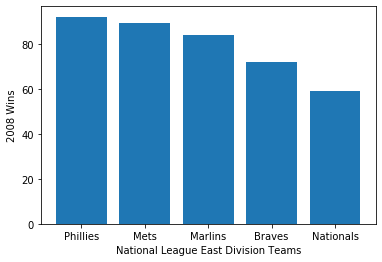

In [21]:
teams = ['Phillies', 'Mets', 'Marlins', 'Braves', 'Nationals']
wins = [92, 89, 84, 72, 59]
plt.bar(teams, wins)
plt.xlabel('National League East Division Teams')
plt.ylabel('2008 Wins')

## Problem 1.15

Text(0, 0.5, 'Units Sold')

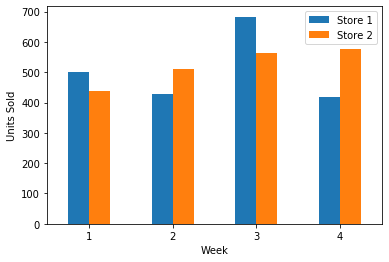

In [22]:
stores = {'Store 1': [502, 428, 683, 419], 'Store 2': [438, 509, 562, 575]}
df4 = pd.DataFrame(stores, index = [1, 2, 3, 4])
chart5 = df4.plot(kind='bar', rot=0)
chart5.set_xlabel('Week')
chart5.set_ylabel('Units Sold')

## Problem 1.16

Text(0, 0.5, 'Units Sold')

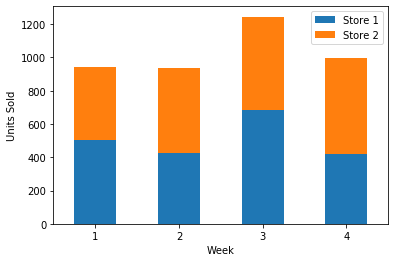

In [23]:
chart6 = df4.plot(kind='bar', rot=0, stacked=True)
chart6.set_xlabel('Week')
chart6.set_ylabel('Units Sold')

## Problem 1.17

Note: be aware that constructing the DataFrame from a nested dictionary like below would reorganise the rows in the sorted order of index. 

    investments = {'Savings': {'Investor 1': 7.2, 'Investor 2': 15.0, 'Investor 3': 12.9},
                   'Bonds': {'Investor 1': 3.8, 'Investor 2': 9.6, 'Investor 3': 7.4}, 
                   'Stocks': {'Investor 1': 11.7, 'Investor 2': 8.0, 'Investor 3': 6.8}} 
    df5 = pd.DataFrame.from_dict(investments, orient = 'index')

Text(0.5, 0, 'Thousand of Dollars')

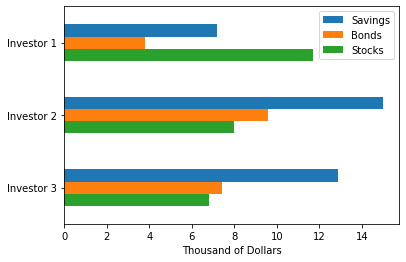

In [24]:
investments = {'Investor 1': [7.2, 3.8, 11.7],
              'Investor 2': [15.0, 9.6, 8.0],
              'Investor 3': [12.9, 7.4, 6.8]}
df5 = pd.DataFrame(investments, index =['Savings', 'Bonds', 'Stocks'])
chart7= df5.T.plot.barh()
chart7.invert_yaxis()
chart7.set_xlabel('Thousand of Dollars')

## Problem 1.18

Text(0.5, 0, 'Thousand of Dollars')

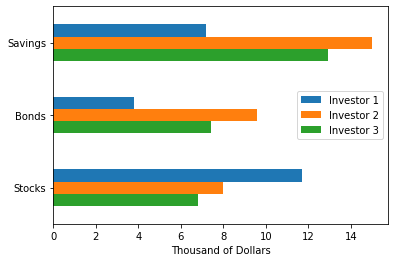

In [25]:
chart8 = df5.plot(kind='barh')
chart8.invert_yaxis()
chart8.set_xlabel('Thousand of Dollars')

## Problem 1.19

Text(0.5, 0, 'Thousand of Dollars')

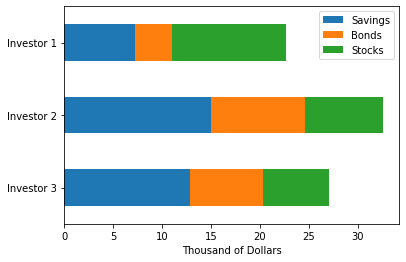

In [26]:
chart9 = df5.T.plot(kind='barh', stacked=True)
chart9.invert_yaxis()
chart9.set_xlabel('Thousand of Dollars')

## Problem 1.20

Text(0.5, 0, 'Thousand of Dollars')

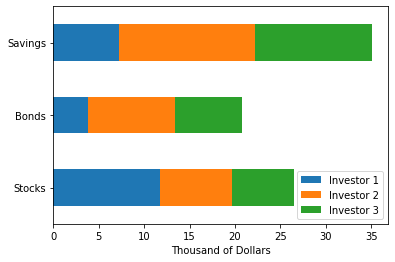

In [27]:
chart10 = df5.plot(kind='barh', stacked=True)
chart10.invert_yaxis()
chart10.set_xlabel('Thousand of Dollars')

# Pie Charts
## Problem 1.21

In [28]:
students = pd.DataFrame({'Number of Students': [9, 12, 7, 2]}, index = ['A', 'B', 'C', 'D'])
students.index.name = 'Grade'
students.loc['Total'] = students.sum()
students['Relative Frequency'] = students['Number of Students'] / students.loc['Total', 'Number of Students']
students['Central Angle'] = students['Relative Frequency'] * 360
students

,Number of Students,Relative Frequency,Central Angle
Grade,,,
A,9,0.300000,108.0
B,12,0.400000,144.0
C,7,0.233333,84.0
D,2,0.066667,24.0
Total,30,1.000000,360.0


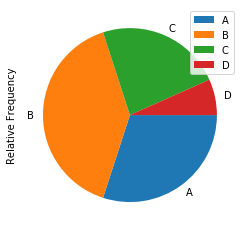

In [29]:
chart11 = students[:-1].plot.pie(y = 'Relative Frequency')
chart11.invert_yaxis()